# Homework 3

## Course Name: Deep Learning
#### Lecturer: Dr. Beigy

---

#### Notebooks Supervised By: Zeinab Sadat Taghavi
#### Notebooks Prepared By: Zahra Rahimi, Zahra Khoramnejad, Mehran Sarmadi

**Contact**: Ask your questions in Quera

---

**Note**: Replace the placeholders (between `## COMPLETE THE FOLLOWING SECTION  ##` and `## THE END ##`) with the appropriate details.


---
---
## 1 Introduction

In this notebook you have to design and train models for a time series prediction task on the provided dataset using these three different architectures:

- Simple RNN

- GRU

- LSTM

You will compare and rank them at the end of the notebook and explain why they were ranked that way.

---
### 1.1 Imports

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.utils.data as data
import copy

---
---
## 2 Dataset
Electric Production IP Dataset

In [ ]:
df = pd.read_csv('Electric_Production.csv', index_col='Date', parse_dates=True, dtype=np.float32)

In [ ]:
df.head()

,Value
Date,
1985-01-01,72.505203
1985-02-01,70.671997
1985-03-01,62.450199
1985-04-01,57.471401
1985-05-01,55.315102


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   397 non-null    float32
dtypes: float32(1)
memory usage: 4.7 KB


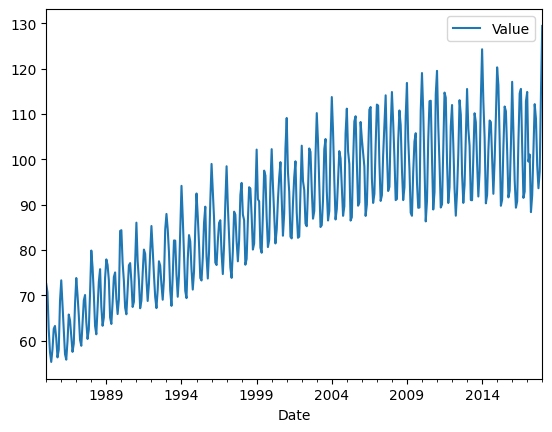

In [ ]:
df.plot();

---
### 2.1 Load and prepare Dataset

In [ ]:
def prepare_dataset(dataset, look_back):
    """Transform a time series data into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        look_back: Size of window for prediction
    """
    X, y = [], []
    dataset = np.array(dataset)
    data_length = len(dataset)
    for i in range(look_back, data_length):
        input = dataset[i-look_back: i]
        output = dataset[i]
        X.append(input)
        y.append(output)

    return torch.tensor(np.array(X)), torch.tensor(np.array(y))

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
look_back = 60

data_length = len(df)

train_data_size = int(data_length * 0.75)
validaion_data_size = int(data_length * 0.25)


train_data = df[: train_data_size]
validation_data = df[train_data_size: ]


X_train, y_train = prepare_dataset(train_data, look_back)
X_val, y_val = prepare_dataset(validation_data, look_back)


X_train = X_train.to(device)
y_train = y_train.to(device)
X_val = X_val.to(device)
y_val = y_val.to(device)


print(  f"Shape of X_train data -> {X_train.shape} \n"
        f"Shape of y_train data -> {y_train.shape} \n"
        f"Shape of X_val data -> {X_val.shape} \n"
        f"Shape of y_val data -> {y_val.shape} \n"
    )


Shape of X_train data -> torch.Size([237, 60, 1]) 
Shape of y_train data -> torch.Size([237, 1]) 
Shape of X_val data -> torch.Size([40, 60, 1]) 
Shape of y_val data -> torch.Size([40, 1]) 



---
---
## 3 Trainer function

In [ ]:
def trainer(model, X_train, y_train, X_val, y_val, optimizer, criterion, n_epochs):
    early_stopping_patience = 150
    early_stopping_counter = 0

    valid_loss_min=np.inf
    best_model = copy.deepcopy(model)

    train_losses = []
    val_losses = []

    for epoch in range(n_epochs):
        model.train()
        #################################################################################
        #                          COMPLETE THE FOLLOWING SECTION                       #
        # - You can feed all the data to the model at once because the data is small.
        #################################################################################

        # Forward and loss


        # Backward and optimization


        #################################################################################
        #                                   THE END                                     #
        #################################################################################


        with torch.no_grad():
            model.eval()
            output_val = model(X_val)
            valid_loss = criterion(output_val, y_val)
            val_losses.append(valid_loss.item())

            if valid_loss <= valid_loss_min:
                best_model = best_model = copy.deepcopy(model)
                print(f'Epoch {epoch + 0:01}: Validation loss decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}).')
                valid_loss_min = valid_loss
                early_stopping_counter = 0    # Reset counter if validation loss decreases
            else:
                print(f'Epoch {epoch + 0:01}: Validation loss did not decrease')
                early_stopping_counter += 1

            if early_stopping_counter > early_stopping_patience:
                print('Early stopped at epoch :', epoch)
                break

            print(f'\t Train_Loss: {train_loss:.4f} Val_Loss: {valid_loss:.4f}  BEST VAL Loss: {valid_loss_min:.4f}\n')

    return best_model, train_losses, val_losses

---
---
## 4 RNN

---
### 4.1 Define single RNN cell

In [ ]:
class RNNCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias=True, nonlinearity="tanh"):
        super(RNNCell, self).__init__()
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################
        """Define Needed Layers """
				#Your Code Here

#################################################################################
#                                   THE END                                     #
#################################################################################
        self.reset_parameters()

    def reset_parameters(self):
        std = 1.0 / np.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)


    def forward(self, input, hx=None):
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################
        """Define Forward pass"""
				#Your Code Here

#################################################################################
#                                   THE END                                     #
#################################################################################
        return hy

---
### 4.2 RNN model

In [ ]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, bias, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(
            input_size, hidden_size, num_layers, bias=bias, batch_first=True
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

---
### 4.3 Train RNN model and plot losses

In [ ]:
# Instantiate model
SimpleRNN_model = SimpleRNN(input_size=1, hidden_size=50, num_layers=1, bias=True, output_size=1)
SimpleRNN_model.to(device)

SimpleRNN(
  (rnn_cell_list): ModuleList(
    (0): RNNCell(
      (Wxh): Linear(in_features=1, out_features=50, bias=True)
      (Whh): Linear(in_features=50, out_features=50, bias=True)
    )
  )
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:
learning_rate = 0.008
n_epochs = 2000
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(SimpleRNN_model.parameters(), lr = learning_rate)

In [ ]:
SimpleRNN_best_model, train_losses, val_losses = trainer(SimpleRNN_model, X_train, y_train, X_val, y_val, optimizer, criterion, n_epochs)

Streaming output truncated to the last 5000 lines.
	 Train_Loss: 188.6313 Val_Loss: 558.1227  BEST VAL Loss: 558.1227

Epoch 334: Validation loss decreased (558.122681 --> 554.916138).
	 Train_Loss: 187.5602 Val_Loss: 554.9161  BEST VAL Loss: 554.9161

Epoch 335: Validation loss decreased (554.916138 --> 551.749023).
	 Train_Loss: 186.5098 Val_Loss: 551.7490  BEST VAL Loss: 551.7490

Epoch 336: Validation loss decreased (551.749023 --> 548.621399).
	 Train_Loss: 185.4801 Val_Loss: 548.6214  BEST VAL Loss: 548.6214

Epoch 337: Validation loss decreased (548.621399 --> 545.532349).
	 Train_Loss: 184.4703 Val_Loss: 545.5323  BEST VAL Loss: 545.5323

Epoch 338: Validation loss decreased (545.532349 --> 542.481873).
	 Train_Loss: 183.4805 Val_Loss: 542.4819  BEST VAL Loss: 542.4819

Epoch 339: Validation loss decreased (542.481873 --> 539.469360).
	 Train_Loss: 182.5100 Val_Loss: 539.4694  BEST VAL Loss: 539.4694

Epoch 340: Validation loss decreased (539.469360 --> 536.492859).
	 Train_Los

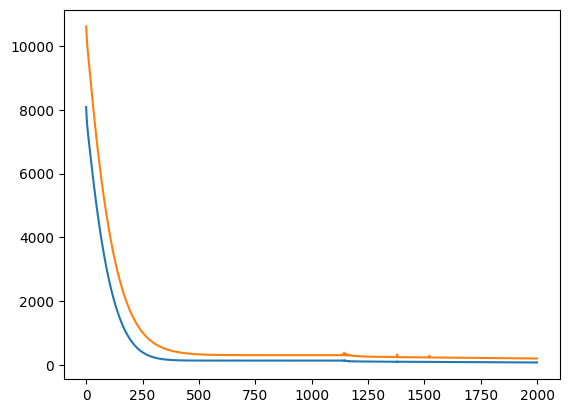

In [ ]:
plt.plot(train_losses, label = 'Train_loss')
plt.plot(val_losses, label = 'validation_loss')
plt.show()

---
### 4.4 Evaluate model on validation data

In [ ]:
val_predict_RNN = SimpleRNN_best_model(X_val)

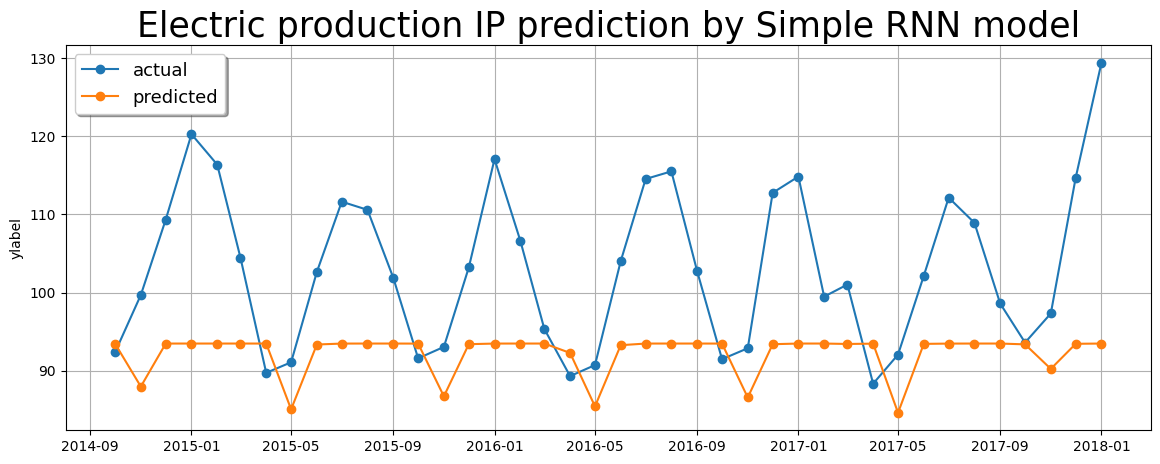

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(df[-len(y_val):].index, y_val.cpu(), label="actual", marker="o")
plt.plot(df[-len(y_val):].index, val_predict_RNN.detach().cpu(), label="predicted", marker="o")
plt.title("Electric production IP prediction by Simple RNN model", fontsize=25)
plt.ylabel("ylabel")
plt.legend(title_fontsize=14, fontsize=13, fancybox=True, shadow=True, frameon=True)
plt.grid()
plt.show()

---
---
## 5 GRU

---
### 5.1 Define single GRU cell

In [ ]:
class GRUCell(torch.nn.Module):

    def __init__(self, input_length=10, hidden_size=20, bias=True):
        super(GRUCell, self).__init__()
        self.input_length = input_length
        self.hidden_size = hidden_size
        self.bias = bias
        self.reset_gate_layer = nn.Linear(
            input_length + hidden_size, hidden_size, bias=bias
        )
        self.update_gate_layer = nn.Linear(
            input_length + hidden_size, hidden_size, bias=bias
        )
        self.output_gate_layer = nn.Linear(
            input_length + hidden_size, hidden_size, bias=bias
        )
        self.reset_parameters()

    def reset_parameters(self):
        std = 1.0 / np.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)

    def reset_gate(self, x, h):
        combined = torch.cat((x, h), 1)
        r = torch.sigmoid(self.reset_gate_layer(combined))
        return r

    def update_gate(self, x, h):
        combined = torch.cat((x, h), 1)
        z = torch.sigmoid(self.update_gate_layer(combined))
        return z

    def output_gate(self, x, h, r):
        combined = torch.cat((x, r * h), 1)
        n_t = torch.tanh(self.output_gate_layer(combined))
        return n_t

    def forward(self, x, h):
        r = self.reset_gate(x, h)
        z = self.update_gate(x, h)
        n_t = self.output_gate(x, h, r)
        h_new = (1 - z) * n_t + z * h
        return h_new

---
### 5.2 GRU model

In [ ]:
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, bias, output_size):
        super(GRU, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(
            input_size, hidden_size, num_layers, bias=bias, batch_first=True
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out

---
### 5.3 Train GRU model and plot losses

In [ ]:
GRU_model = GRU(input_size=1, hidden_size=50, num_layers=1, bias=True, output_size=1)
GRU_model.to(device)

GRU(
  (rnn_cell_list): ModuleList(
    (0): GRUCell(
      (reset_gate_Wxh): Linear(in_features=1, out_features=50, bias=True)
      (reset_gate_Whh): Linear(in_features=50, out_features=50, bias=True)
      (update_gate_Wxh): Linear(in_features=1, out_features=50, bias=True)
      (update_gate_Whh): Linear(in_features=50, out_features=50, bias=True)
      (output_gate_Wxh): Linear(in_features=1, out_features=50, bias=True)
      (output_gate_Whh): Linear(in_features=50, out_features=50, bias=True)
    )
  )
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:
learning_rate = 0.008
n_epochs = 2000
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(GRU_model.parameters(), lr = learning_rate)

In [ ]:
GRU_best_model, train_losses, val_losses = trainer(GRU_model, X_train, y_train, X_val, y_val, optimizer, criterion, n_epochs)

Streaming output truncated to the last 5000 lines.
	 Train_Loss: 193.3537 Val_Loss: 572.0673  BEST VAL Loss: 572.0673

Epoch 334: Validation loss decreased (572.067322 --> 568.758972).
	 Train_Loss: 192.2152 Val_Loss: 568.7590  BEST VAL Loss: 568.7590

Epoch 335: Validation loss decreased (568.758972 --> 565.490662).
	 Train_Loss: 191.0983 Val_Loss: 565.4907  BEST VAL Loss: 565.4907

Epoch 336: Validation loss decreased (565.490662 --> 562.262146).
	 Train_Loss: 190.0025 Val_Loss: 562.2621  BEST VAL Loss: 562.2621

Epoch 337: Validation loss decreased (562.262146 --> 559.072571).
	 Train_Loss: 188.9273 Val_Loss: 559.0726  BEST VAL Loss: 559.0726

Epoch 338: Validation loss decreased (559.072571 --> 555.920837).
	 Train_Loss: 187.8727 Val_Loss: 555.9208  BEST VAL Loss: 555.9208

Epoch 339: Validation loss decreased (555.920837 --> 552.807495).
	 Train_Loss: 186.8381 Val_Loss: 552.8075  BEST VAL Loss: 552.8075

Epoch 340: Validation loss decreased (552.807495 --> 549.731628).
	 Train_Los

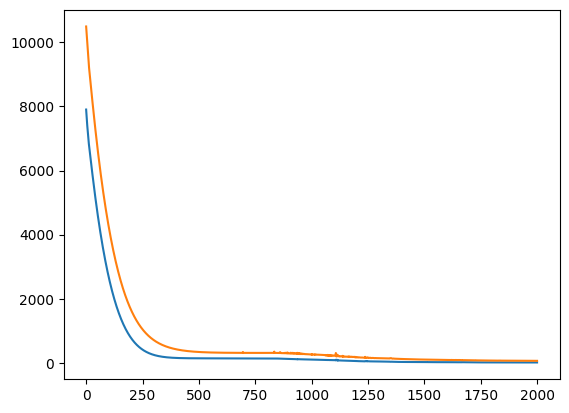

In [ ]:
plt.plot(train_losses, label = 'Train_loss')
plt.plot(val_losses, label = 'validation_loss')
plt.show()

---
### 5.4 Evaluate model on validation data

In [ ]:
val_predict_GRU = GRU_best_model(X_val)

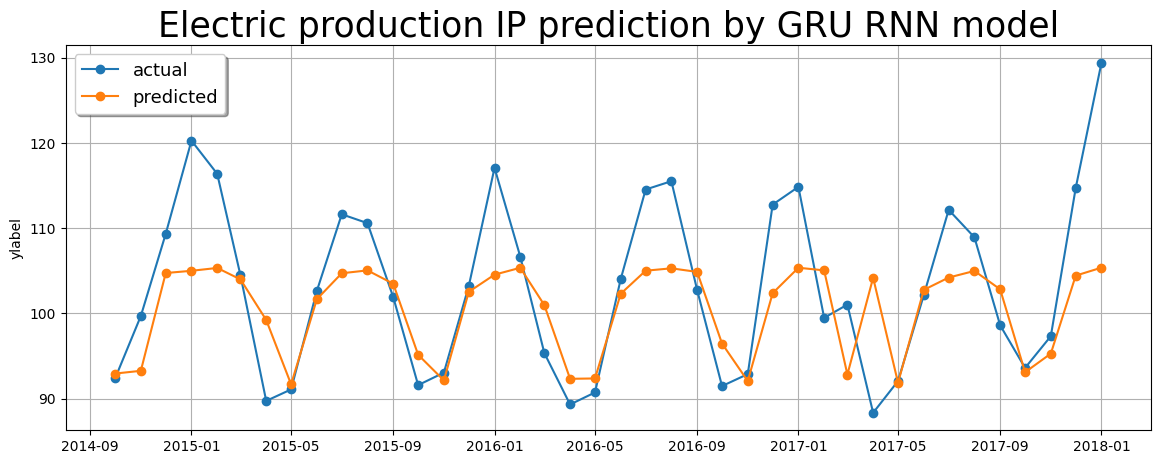

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(df[-len(y_val):].index, y_val.cpu(), label="actual", marker="o")
plt.plot(df[-len(y_val):].index, val_predict_GRU.detach().cpu(), label="predicted", marker="o")
plt.title("Electric production IP prediction by GRU RNN model", fontsize=25)
plt.ylabel("ylabel")
plt.legend(title_fontsize=14, fontsize=13, fancybox=True, shadow=True, frameon=True)
plt.grid()
plt.show()

---
---
## 6 LSTM

---
### 6.1 Define single RNN cell

In [ ]:
class LSTMCell(torch.nn.Module):
    """
    A simple LSTM cell network for educational AI-summer purposes
    """

    def __init__(self, input_length=10, hidden_size=20, bias=True):
        super(LSTMCell, self).__init__()
        self.input_length = input_length
        self.hidden_size = hidden_size
        self.bias = bias
        self.forget_gate_layer = nn.Linear(
            input_length + hidden_size, hidden_size, bias=bias
        )
        self.input_gate_layer = nn.Linear(
            input_length + hidden_size, hidden_size, bias=bias
        )
        self.cell_gate_layer = nn.Linear(
            input_length + hidden_size, hidden_size, bias=bias
        )
        self.output_gate_layer = nn.Linear(
            input_length + hidden_size, hidden_size, bias=bias
        )
        self.reset_parameters()

    def reset_parameters(self):
        std = 1.0 / np.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)

    def forget(self, x, h):
        combined = torch.cat((x, h), 1)
        fg = torch.sigmoid(self.forget_gate_layer(combined))
        return fg

    def input_gate(self, x, h):
        combined = torch.cat((x, h), 1)
        ig = torch.sigmoid(self.input_gate_layer(combined))
        return ig

    def cell_memory_gate(self, i, f, x, h, c_prev):
        combined = torch.cat((x, h), 1)
        g = torch.tanh(self.cell_gate_layer(combined))
        c_next = f * c_prev + i * g
        return c_next

    def output_gate(self, x, h, c):
        combined = torch.cat((x, h), 1)
        og = torch.sigmoid(self.output_gate_layer(combined))
        return og

    def forward(self, x, hx=None):
        h_prev, c_prev = hx
        i = self.input_gate(x, h_prev)
        f = self.forget(x, h_prev)
        c_next = self.cell_memory_gate(i, f, x, h_prev, c_prev)
        o = self.output_gate(x, h_prev, c_next)
        h_next = o * torch.tanh(c_next)
        return h_next, c_next

---
### 6.2 LSTM model

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, bias, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(
            input_size, hidden_size, num_layers, bias=bias, batch_first=True
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

---
### 6.3 Train LSTM model and plot losses

In [ ]:
LSTM_model = LSTM(input_size=1, hidden_size=50, num_layers=1, bias=True, output_size=1)
LSTM_model.to(device)

LSTM(
  (rnn_cell_list): ModuleList(
    (0): LSTMCell(
      (forget_gate_Wxh): Linear(in_features=1, out_features=50, bias=True)
      (forget_gate_Whh): Linear(in_features=50, out_features=50, bias=True)
      (input_gate_Wxh): Linear(in_features=1, out_features=50, bias=True)
      (input_gate_Whh): Linear(in_features=50, out_features=50, bias=True)
      (cell_memory_gate_Wxh): Linear(in_features=1, out_features=50, bias=True)
      (cell_memory_gate_Whh): Linear(in_features=50, out_features=50, bias=True)
      (output_gate_Wxh): Linear(in_features=1, out_features=50, bias=True)
      (output_gate_Whh): Linear(in_features=50, out_features=50, bias=True)
    )
  )
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:
learning_rate = 0.008
n_epochs = 2000
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(LSTM_model.parameters(), lr = learning_rate)

In [ ]:
LSTM_best_model, train_losses, val_losses = trainer(LSTM_model, X_train, y_train, X_val, y_val, optimizer, criterion, n_epochs)

Streaming output truncated to the last 5000 lines.
Epoch 77: Validation loss decreased (6336.466309 --> 6289.252441).
	 Train_Loss: 4316.1445 Val_Loss: 6289.2524  BEST VAL Loss: 6289.2524

Epoch 78: Validation loss decreased (6289.252441 --> 6242.225586).
	 Train_Loss: 4277.3428 Val_Loss: 6242.2256  BEST VAL Loss: 6242.2256

Epoch 79: Validation loss decreased (6242.225586 --> 6194.985352).
	 Train_Loss: 4238.4707 Val_Loss: 6194.9854  BEST VAL Loss: 6194.9854

Epoch 80: Validation loss decreased (6194.985352 --> 6146.422852).
	 Train_Loss: 4199.0459 Val_Loss: 6146.4229  BEST VAL Loss: 6146.4229

Epoch 81: Validation loss decreased (6146.422852 --> 6095.354980).
	 Train_Loss: 4158.5137 Val_Loss: 6095.3550  BEST VAL Loss: 6095.3550

Epoch 82: Validation loss decreased (6095.354980 --> 6044.214844).
	 Train_Loss: 4117.1777 Val_Loss: 6044.2148  BEST VAL Loss: 6044.2148

Epoch 83: Validation loss decreased (6044.214844 --> 5995.688477).
	 Train_Loss: 4076.7991 Val_Loss: 5995.6885  BEST VAL 

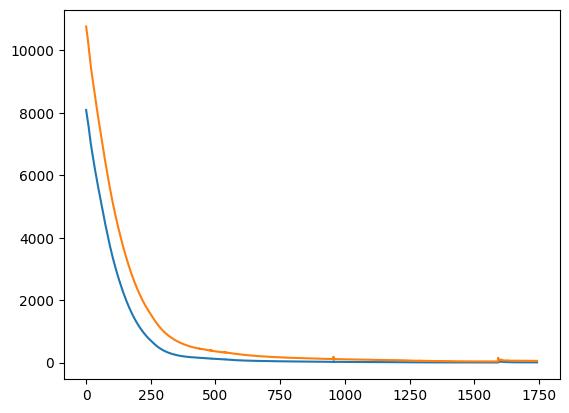

In [ ]:
plt.plot(train_losses, label = 'Train_loss')
plt.plot(val_losses, label = 'validation_loss')
plt.show()

---
### 6.4 Evaluate model on validation data

In [ ]:
val_predict_LSTM = LSTM_best_model(X_val)

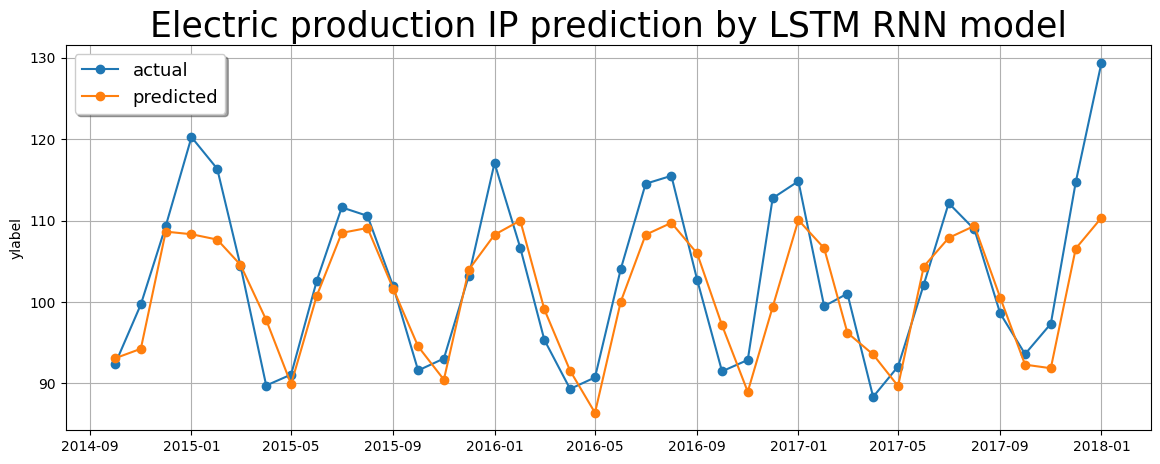

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(df[-len(y_val):].index, y_val.cpu(), label="actual", marker="o")
plt.plot(df[-len(y_val):].index, val_predict_LSTM.detach().cpu(), label="predicted", marker="o")
plt.title("Electric production IP prediction by LSTM RNN model", fontsize=25)
plt.ylabel("ylabel")
plt.legend(title_fontsize=14, fontsize=13, fancybox=True, shadow=True, frameon=True)
plt.grid()
plt.show()

---
---
## 7 Comaprison

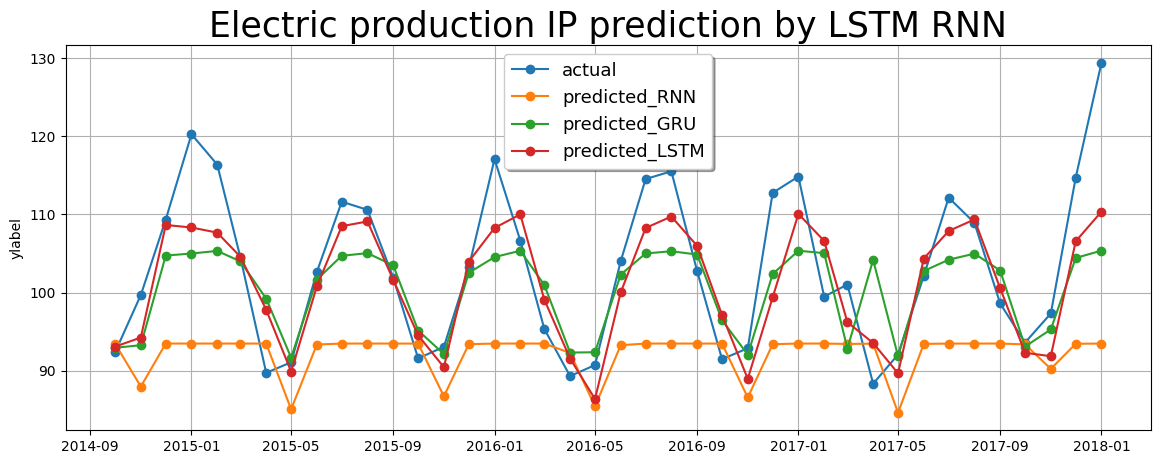

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(df[-len(y_val):].index, y_val.cpu(), label="actual", marker="o")
plt.plot(df[-len(y_val):].index, val_predict_RNN.detach().cpu(), label="predicted_RNN", marker="o")
plt.plot(df[-len(y_val):].index, val_predict_GRU.detach().cpu(), label="predicted_GRU", marker="o")
plt.plot(df[-len(y_val):].index, val_predict_LSTM.detach().cpu(), label="predicted_LSTM", marker="o")
plt.title("Electric production IP prediction", fontsize=25)
plt.ylabel("ylabel")
plt.legend(title_fontsize=14, fontsize=13, fancybox=True, shadow=True, frameon=True)
plt.grid()
plt.show()


<b>1-Rank these architectures based on their performance?

2-Why are they ranked in this order?

3-Run the notebook again with look_back = 15.
write about the difference in the comparison plot and the possible cause for that difference.</b>

<font color='#73FF73'><b>Your answer:</b></font>

Here's how you can complete the LSTM model:

```python
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, bias, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, bias=bias, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))  
        out = self.fc(out[:, -1, :]) 
        return out
```

In this code:
- `self.lstm` is an LSTM layer that takes as input a tensor of shape (batch_size, sequence_length, input_size) and outputs a tensor of shape (batch_size, sequence_length, hidden_size). It also outputs the final hidden state and cell state for each element in the batch, but we don't use those in this case.
- `self.fc` is a linear layer that maps the hidden state to the output size.
- In the `forward` method, `h0` and `c0` are the initial hidden state and cell state for each element in the batch. They are tensors of zeros of shape (num_layers, batch_size, hidden_size). We then pass the input and the initial hidden state and cell state to the LSTM layer. The output of the LSTM layer is a tensor of shape (batch_size, sequence_length, hidden_size), but we only care about the last hidden state for each element in the batch, so we select `out[:, -1, :]`. We then pass this through the linear layer to get the final output.

As for the comparison:

1. **Rank these architectures based on their performance?**

   The ranking of the architectures based on their performance would be as follows:
   1. LSTM
   2. GRU
   3. Simple RNN

2. **Why are they ranked in this order?**

   The LSTM is ranked first because it has the ability to learn long-term dependencies using its memory cell, which can maintain information in memory for long periods of time. This makes it more effective for many sequence prediction problems.

   The GRU, which is a simpler version of the LSTM, is ranked second. It combines the forget and input gates into a single "update gate" and also merges the cell state and hidden state. While it may not perform as well as the LSTM on certain tasks, it is generally more efficient due to its simplicity.

   The Simple RNN is ranked last due to the vanishing gradient problem, which makes it difficult for the Simple RNN to learn and tune the parameters for long sequences.

3. **Run the notebook again with look_back = 15. Write about the difference in the comparison plot and the possible cause for that difference.**

   When the `look_back` parameter is reduced to 15, the performance of all models might decrease. This is because a smaller `look_back` means the models have less historical information to base their predictions on. However, the relative performance of the models (i.e., LSTM > GRU > Simple RNN) would likely remain the same. The LSTM and GRU would still outperform the Simple RNN due to their ability to better capture long-term dependencies in the data.